In [1]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF VERSION : ", tf.__version__)
print("TF HUB VERSION : " , hub.__version__)
print("GPU", "Yess !!!" if tf.config.list_physical_devices("GPU") else "not available :(")

TF VERSION :  2.19.1
TF HUB VERSION :  0.16.1
GPU Yess !!!


In [2]:
import pandas as pd

In [3]:
meta_df = pd.read_csv("/Users/tushar04master/Documents/car-classifier/data/devkit/cars_meta.csv")

#Creates a new column
meta_df['class'] = meta_df.index+1
#a new column named class with the numbers 1, 2, 3, ..., perfectly matching the IDs in your other file.
annos_train_df = pd.read_csv("/Users/tushar04master/Documents/car-classifier/data/devkit/model_train_annos.csv")

annos_train_df.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fname
0,39,116,569,375,14,00001.jpg
1,36,116,868,587,3,00002.jpg
2,85,109,601,381,91,00003.jpg
3,621,393,1484,1096,134,00004.jpg
4,14,36,133,99,106,00005.jpg


In [4]:
meta_df.head()

,class_name,class
0,AM General Hummer SUV 2000,1
1,Acura RL Sedan 2012,2
2,Acura TL Sedan 2012,3
3,Acura TL Type-S 2008,4
4,Acura TSX Sedan 2012,5


Now since we have added a class in cars meta file , we can now merge them

#### But why we have to merge them ?
 Answer : Because the cars_annos.csv(THIS IS THE MAIN LABEL CSV) have boundary box , class and image id , but it does't have the name of the cars . The cars_meta.csv have the cars names but not the class column . So we have 1st created the class column and then we are going to merge them to create a complete labels.csv for our project.

#### Why is the labels.csv important ? 
Answer :  Because its the Answer sheet for our model . With this given to our model , it will now correct itself that 'Oh yeah , this class id car in the pic 0001.png is this model car ' . 
That's y it's a very important file in a Supervised training model . 

### What is a Dataframe ?
A Pandas DataFrame is a 2 dimensional data structure, like a 2 dimensional array, or a table with rows and columns.

syntax : 

import pandas as pd

data = {

  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
  
}

#load data into a DataFrame object:

df = pd.DataFrame(data)

print(df)

### What is pandas.merge ? 

The merge() method updates the content of two DataFrame by merging them together, using the specified method(s).

Syntax : 

dataframe.merge(right, how, on, left_on, right_on, left_index, right_index, sort, suffixes, copy, indicator, validate)


In [ ]:
df_meta = pd.DataFrame(meta_df)
df_train_annos = pd.DataFrame(annos_train_df)

In [6]:
final_df = df_meta.merge(df_train_annos , on = 'class' , how = 'left')

In [7]:
final_df.head()

,class_name,class,bbox_x1,bbox_y1,bbox_x2,bbox_y2,fname
0,AM General Hummer SUV 2000,1,46,84,661,428,00163.jpg
1,AM General Hummer SUV 2000,1,5,8,83,58,00462.jpg
2,AM General Hummer SUV 2000,1,6,7,94,68,00522.jpg
3,AM General Hummer SUV 2000,1,26,32,677,418,00707.jpg
4,AM General Hummer SUV 2000,1,33,50,197,150,00773.jpg


<Axes: xlabel='class_name'>

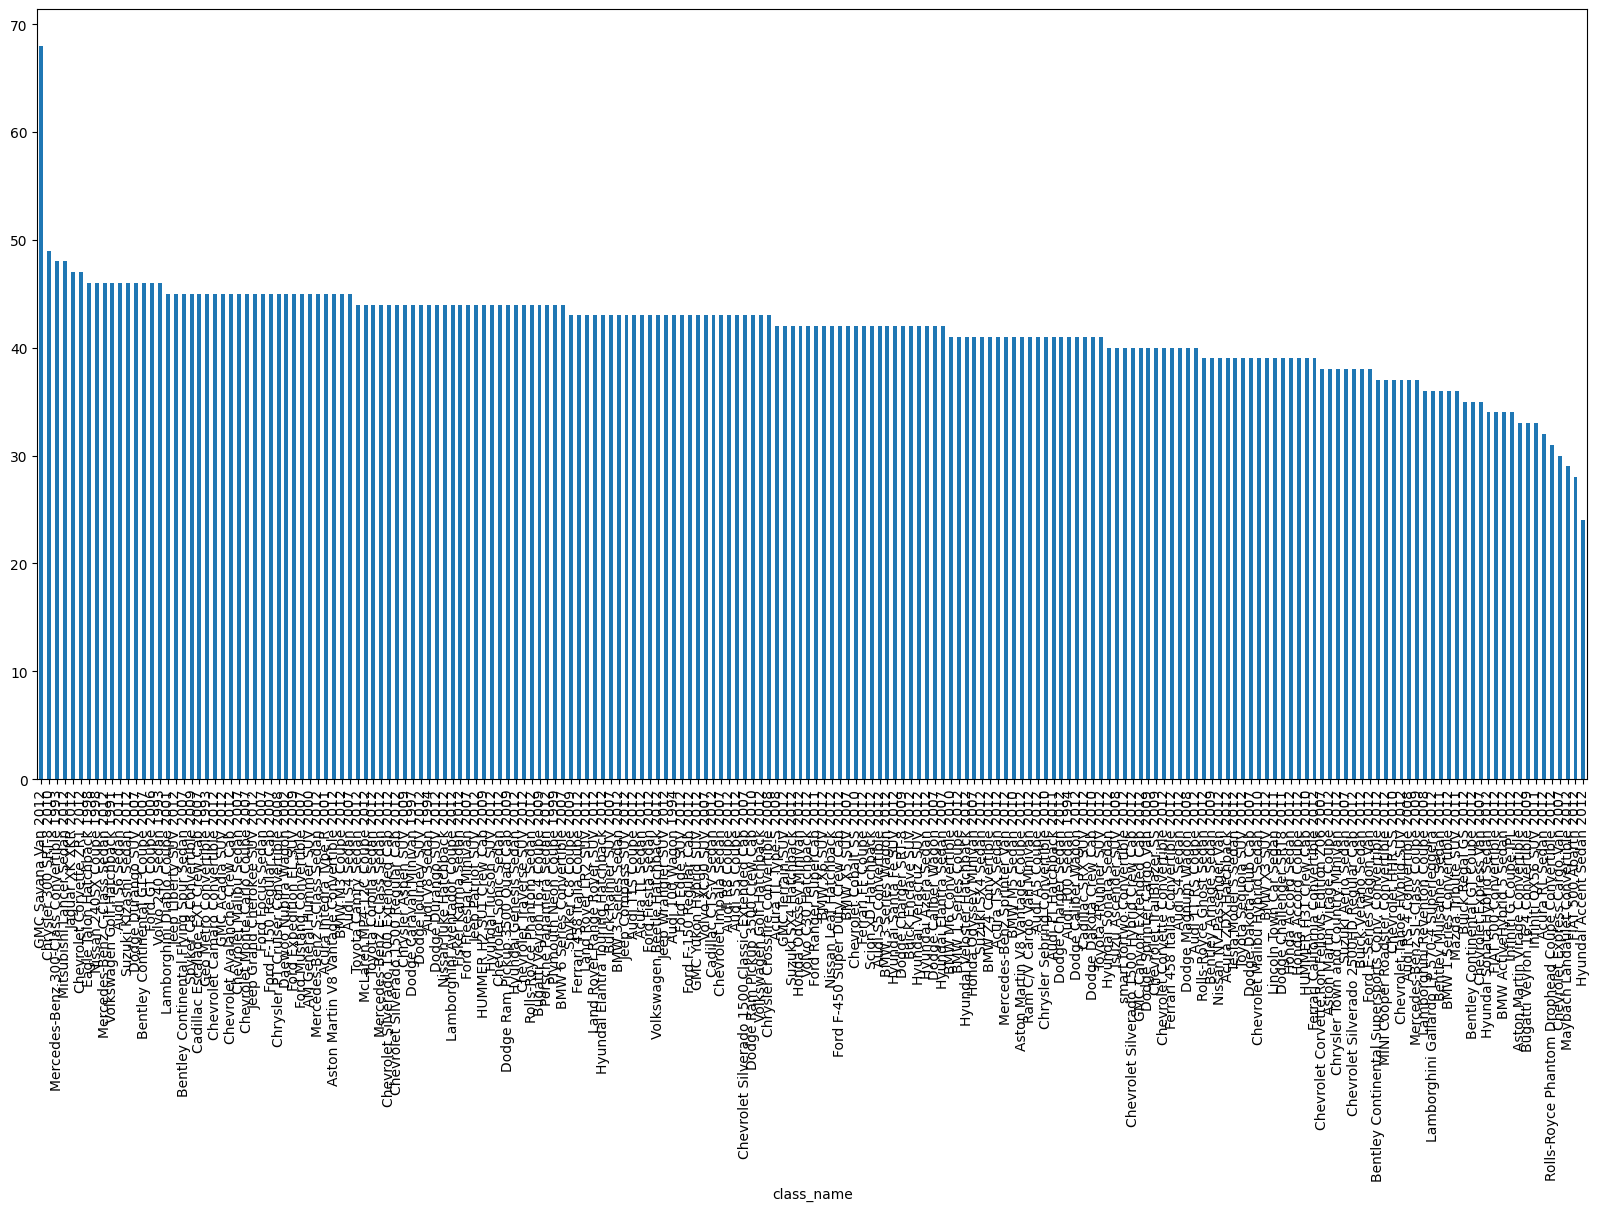

In [8]:
final_df["class_name"].value_counts().plot.bar(figsize=(20, 10))

## Preparing our dataset for training

### Why create Pathnames ?
A program can't open or read a file if it only has it title(image id). It needs the full, unambiguous address to find it on the hard drive.

In this project , the machine learning model needs to actually look at the pixels of each image to learn from it. This list of pathnames is the "address book" your program will use to locate and open every single image file you want it to train on.

In [9]:
final_df.head(2)


,class_name,class,bbox_x1,bbox_y1,bbox_x2,bbox_y2,fname
0,AM General Hummer SUV 2000,1,46,84,661,428,00163.jpg
1,AM General Hummer SUV 2000,1,5,8,83,58,00462.jpg


The **full_path column** should contain the complete address that your Python program needs to find and open each image file on your computer.
Right now , we have 

filename    	class_name

00001.jpg	Audi S4 Sedan 2012

00002.jpg	Acura ZDX Hatchback 2012

The filename 00001.jpg by itself isn't enough. The program doesn't know which folder it's in.

We know that all your training images are inside the cars_train folder.

So, the full_path column will combine the folder name and the filename. It should look like this after you create it:

filename	class_name	full_path

00001.jpg	Audi S4 Sedan 2012	cars_train/00001.jpg

00002.jpg	Acura ZDX Hatchback 2012	cars_train/00002.jpg

#### **This new column gives the code the exact "address" to locate every single image.**





In [10]:
# Creating pathnames
filenames = ["/Users/tushar04master/Documents/car-classifier/data/cars_train/" + fname for fname in final_df["fname"]]
# Check the first 10
filenames[:10]

['/Users/tushar04master/Documents/car-classifier/data/cars_train/00163.jpg',
 '/Users/tushar04master/Documents/car-classifier/data/cars_train/00462.jpg',
 '/Users/tushar04master/Documents/car-classifier/data/cars_train/00522.jpg',
 '/Users/tushar04master/Documents/car-classifier/data/cars_train/00707.jpg',
 '/Users/tushar04master/Documents/car-classifier/data/cars_train/00773.jpg',
 '/Users/tushar04master/Documents/car-classifier/data/cars_train/00887.jpg',
 '/Users/tushar04master/Documents/car-classifier/data/cars_train/00946.jpg',
 '/Users/tushar04master/Documents/car-classifier/data/cars_train/01277.jpg',
 '/Users/tushar04master/Documents/car-classifier/data/cars_train/01661.jpg',
 '/Users/tushar04master/Documents/car-classifier/data/cars_train/01832.jpg']

In [11]:
import os
if len(os.listdir("/Users/tushar04master/Documents/car-classifier/data/cars_train/")) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do no match actual amount of files, check the target directory.")

Filenames match actual amount of files!!! Proceed.


#  DAY 2 🔥 

### Splitting the data into features(X) and labels(y)

To split the data, we first need to define our inputs (X) and our targets (y).

X (The Features): This is the data we will use to make a prediction. In our case, it's the list of full image paths from your DataFrame.

y (The Labels): This is what we want to predict. It's the list of car names (class_name) that correspond to each image path.

Once you have X and y, you'll pass them to the train_test_split function.

There's one very important trick for this dataset. Many car models might only have a few images. To make sure both your training and validation sets get a fair share of every car model, you should use the **"stratify=y" argument** in the function. This tells the function to split the data in a way that preserves the same percentage of each car model in both sets.

In [12]:
import numpy as np
cars_array = np.array(final_df["class_name"]) # Getting our class_name as an array 
unique_cars = np.unique(cars_array) # Getting the unique cars models
unique_cars # This is our label(y) ❌



array(['AM General Hummer SUV 2000', 'Acura Integra Type R 2001',
       'Acura RL Sedan 2012', 'Acura TL Sedan 2012',
       'Acura TL Type-S 2008', 'Acura TSX Sedan 2012',
       'Acura ZDX Hatchback 2012',
       'Aston Martin V8 Vantage Convertible 2012',
       'Aston Martin V8 Vantage Coupe 2012',
       'Aston Martin Virage Convertible 2012',
       'Aston Martin Virage Coupe 2012', 'Audi 100 Sedan 1994',
       'Audi 100 Wagon 1994', 'Audi A5 Coupe 2012', 'Audi R8 Coupe 2012',
       'Audi RS 4 Convertible 2008', 'Audi S4 Sedan 2007',
       'Audi S4 Sedan 2012', 'Audi S5 Convertible 2012',
       'Audi S5 Coupe 2012', 'Audi S6 Sedan 2011',
       'Audi TT Hatchback 2011', 'Audi TT RS Coupe 2012',
       'Audi TTS Coupe 2012', 'Audi V8 Sedan 1994',
       'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012',
       'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012',
       'BMW 6 Series Convertible 2007', 'BMW ActiveHybrid 5 Sedan 2012',
       'BMW M3 Coupe 2012', 'BMW

In [13]:
'''
# Splitting data into X and y ( Features and labels)

X = filenames
y = unique_cars

# Getting train test split function ready

from sklearn.model_selection import train_test_split
X_train , X_val , y_train , y_val = train_test_split(X , y , test_size=0.2 , random_state=42)
'''

'\n# Splitting data into X and y ( Features and labels)\n\nX = filenames\ny = unique_cars\n\n# Getting train test split function ready\n\nfrom sklearn.model_selection import train_test_split\nX_train , X_val , y_train , y_val = train_test_split(X , y , test_size=0.2 , random_state=42)\n'

### This is wrong

The problem is that X has over 8,000 file paths, but y (your unique_cars) only has 196 items (the number of unique car models).

For train_test_split to work, X and y must have the exact same number of items. y needs to be the

 full list of labels, where the first label corresponds to the first filename, the second label to
 
  the second filename, and so on.

### The Correction

The good news is you already have this list! It's simply your final_df["class_name"] column.



In [14]:
# Splitting features and labels

X = filenames
y = final_df["class_name"]

# Importing train test split
from sklearn.model_selection import train_test_split
X_train , X_val , y_train , y_val = train_test_split(X , y , test_size=0.2 , random_state=42 , stratify=y)
# Adding stratify=y ensures both train and validation sets have a similar mix of car models.
print(f"Number of training images: {len(X_train)}")
print(f"Number of training labels: {len(y_train)}")
print(f"Number of validation images: {len(X_val)}")
print(f"Number of validation labels: {len(y_val)}")

Number of training images: 6515
Number of training labels: 6515
Number of validation images: 1629
Number of validation labels: 1629


### Creating our Data Pipeline using TensorFlow 2 ( tf.data )

The next and final step before we can build a model is to create an efficient data pipeline.

Think of it like this: your X_train is a list of over 6,000 image addresses. You can't load all of

 those images into memory at once—**you'd crash your computer.**

So, we'll build a pipeline using TensorFlow's tf.data API that will act like a smart conveyor belt. It will:

1. Grab a small batch of image paths (say, 32 at a time).

2. Go to those addresses and load the 32 images from your hard drive.

3. Preprocess them on-the-fly (resize them to a standard size, like 224x224 pixels).

4. Convert the corresponding 32 text labels (e.g., "Audi S4...") into numbers that the model can understand.

5. Feed this perfectly prepared batch to the GPU for training.

This is the modern, professional way to handle large image datasets. It's highly efficient and is a core skill for deep learning.

#### Our Data pipeline will have two main parts :

1. A "Worker" Function: This function's job is to process one single image. It will take a file 

 path and a text label, and its output will be a ready-to-use image tensor and a numerical label. 

 Let's call this function "process_image".


2. A "Manager" Function: This function will use tf.data to manage the whole process. It will take 

  our big lists (X_train, y_train), feed them to the "worker" function in parallel, and then shuffle

  and batch the results. Let's call this "create_dataset".


Before creating our worker function , we need to first turn a text label like "Audi S4 Sedan 2012"

 into a number (e.g., 14) ✅

 We will be using the **"tf.keras.layers.StringLookup"** layer for this that will  maps every unique car
 
  name to a unique integer. ✅

In [15]:
unique_cars # Its an array

array(['AM General Hummer SUV 2000', 'Acura Integra Type R 2001',
       'Acura RL Sedan 2012', 'Acura TL Sedan 2012',
       'Acura TL Type-S 2008', 'Acura TSX Sedan 2012',
       'Acura ZDX Hatchback 2012',
       'Aston Martin V8 Vantage Convertible 2012',
       'Aston Martin V8 Vantage Coupe 2012',
       'Aston Martin Virage Convertible 2012',
       'Aston Martin Virage Coupe 2012', 'Audi 100 Sedan 1994',
       'Audi 100 Wagon 1994', 'Audi A5 Coupe 2012', 'Audi R8 Coupe 2012',
       'Audi RS 4 Convertible 2008', 'Audi S4 Sedan 2007',
       'Audi S4 Sedan 2012', 'Audi S5 Convertible 2012',
       'Audi S5 Coupe 2012', 'Audi S6 Sedan 2011',
       'Audi TT Hatchback 2011', 'Audi TT RS Coupe 2012',
       'Audi TTS Coupe 2012', 'Audi V8 Sedan 1994',
       'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012',
       'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012',
       'BMW 6 Series Convertible 2007', 'BMW ActiveHybrid 5 Sedan 2012',
       'BMW M3 Coupe 2012', 'BMW

In [16]:
#  Creates a list of the unique car names from the final_df
# Since I already have an array , I have converted the array(unique_cars) to list directly using .tolist()


unique_list = unique_cars.tolist()
unique_list

['AM General Hummer SUV 2000',
 'Acura Integra Type R 2001',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi A5 Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi S4 Sedan 2007',
 'Audi S4 Sedan 2012',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S6 Sedan 2011',
 'Audi TT Hatchback 2011',
 'Audi TT RS Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi V8 Sedan 1994',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',
 'BMW 3 Series Sedan 2012',
 'BMW 3 Series Wagon 2012',
 'BMW 6 Series Convertible 2007',
 'BMW ActiveHybrid 5 Sedan 2012',
 'BMW M3 Coupe 2012',
 'BMW M5 Sedan 2010',
 'BMW M6 Convertible 2010',
 'BMW X3 SUV 2012',
 'BMW X5 SUV 2007',
 'BMW X6

#### What is tf.keras.layers.StringLookup?

Think of it as a highly optimized, automated dictionary builder. Its sole purpose is to map strings to integer numbers.

You give it a list of all your unique strings (your unique_cars list), and it internally creates a lookup table. For example:

"AM General Hummer SUV 2000" -> 0

"Acura RL Sedan 2012" -> 1

"Acura TL Sedan 2012" -> 2

...and so on for all 196 cars.

##### What does it do?

It takes a string in list format as input and gives you back the corresponding integer from its internal 

dictionary. This is the crucial step for turning our text labels into a numerical format that a 

machine learning model can understand.



In [17]:
string_to_int_lookup = tf.keras.layers.StringLookup(vocabulary=unique_list)

# We now have our label distionary ☝️

# Build lookup from ALL labels
#string_to_int_lookup = tf.keras.layers.StringLookup(output_mode="int")
#string_to_int_lookup.adapt(np.concatenate([y_train, y_val]))  # fit once


2025-08-28 09:50:02.698347: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-08-28 09:50:02.698377: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-08-28 09:50:02.698381: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1756354802.698872   42630 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1756354802.698905   42630 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
string = "Acura TL Sedan 2012"
nameint = string_to_int_lookup(string)
print(f"The string '{string}' is converted to the integer: {nameint}")


The string 'Acura TL Sedan 2012' is converted to the integer: 4


# **Day 2 🚀**

### Let's Create the Worker function ( process_image )

Our Worker function will : 

1. Read the image file from the path. {tf.io.read_file()} ✅

2. Decode the JPEG data into a tensor. {tf.image.decode_jpeg()} ✅

3. Resize the image to a consistent size (like 224x224). {tf.image.resize()} ✅

4. Convert the string label into a number using the string_to_int_lookup layer you already created. {string_to_int_lookup} ✅

In [19]:
## Worker Function

IMG_SIZE = 224

def process_image(image_path , label) : 
    """
    Takes an image file path and a string label, and returns a
    preprocessed image tensor and an integer label.
    """
    # Read + decode
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image , channels=3)
    # Resize
    image = tf.image.resize(image , [IMG_SIZE , IMG_SIZE])
    image = tf.cast(image, tf.float32)
    label = string_to_int_lookup(label)
    return image , label

#### The Manager Function

We need a function that takes our big lists of file paths and labels (X_train, y_train) and uses 

your process_image function to create a fully optimized tf.data.Dataset object. This is the 

"conveyor belt" we talked about.

This new function, let's call it create_dataset, will do the following:

1. Create a base dataset: It will start by creating a simple dataset from your lists of paths and

 labels using tf.data.Dataset.from_tensor_slices((X,y)).

2. Apply the worker: It will then use the .map() method to run your process_image function on every 

single image-label pair. This is where the real work happens.

3. Optimize for training: Finally, it will perform three crucial optimization steps:

 .shuffle() to randomize the order of the data, which helps the model learn better.

.batch() to group the individual images into batches (e.g., of 32) for efficient processing on the GPU.

.prefetch() to prepare the next batch of data in the background while the current batch is being

 processed, eliminating bottlenecks.

This is the final step in our data preparation. Once we have this function, we'll have our final 

train_dataset and val_dataset objects, ready to be fed into a model.

In [20]:
# Adding Data Augmentation to fight over-fitting in fine tuning
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomTranslation(0.1, 0.1),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomBrightness(0.1),
], name = "data_augmentation")

In [21]:
## The Manager Function

def create_dataset(X , y, is_training=True):

    BATCH_SIZE = 32 # Defining batch size
    dataset = tf.data.Dataset.from_tensor_slices((X,y)) # creting the base dataset
    dataset = dataset.map(process_image , num_parallel_calls=tf.data.AUTOTUNE) # Applying the worker😂 to work 
    if is_training:
        # Apply data augmentation ONLY to the training set
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label),
                              num_parallel_calls=tf.data.AUTOTUNE)
        # Shuffle ONLY the training set
        dataset = dataset.shuffle(buffer_size=1000)
    #dataset = dataset.shuffle(buffer_size=len(X)) # Shuffling the images(train & val imgs) to help model train better without partiality
    dataset = dataset.batch(batch_size=BATCH_SIZE) # defining batch size 
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE) # dynamically adjust the number of batches to prefetch

    # The AUTOTUNE part is a magic performance booster that tells TensorFlow to run the processing in parallel.

    return dataset

In [22]:
# Now , applying the  Manager functions to create the training and validation datasets🥳
train_dataset = create_dataset(X_train , y_train, is_training = True)
val_dataset = create_dataset(X_val , y_val, is_training = False)
print("Data pipelines are ready. Augmentation will only be applied to train_dataset. ✅")


Data pipelines are ready. Augmentation will only be applied to train_dataset. ✅


In [ ]:
import os

# Use validation set as test set
# Create test filenames from the test folder
test_filenames = ["/Users/tushar04master/Documents/car-classifier/data/cars_test/" + fname for fname in final_df.loc[final_df["fname"].str.startswith("0"), "fname"]]

# If you have a separate test annotation file, use it instead of filtering by fname above.
# For now, let's assume you want to use all files in the cars_test folder:
test_filenames = [
    os.path.join("/Users/tushar04master/Documents/car-classifier/data/cars_test/", fname)
    for fname in os.listdir("/Users/tushar04master/Documents/car-classifier/data/cars_test/")
    if fname.endswith(".jpg")
]

# If you have test labels, load them here. Otherwise, use dummy labels (e.g., zeros) for prediction.
test_labels = [0] * len(test_filenames)  # Dummy labels if you don't have ground truth

test_dataset = create_dataset(test_filenames, test_labels, is_training=False)

## The data preparation is officially **done** ✅

# Building and Training the model 🤖

we are going to use a powerful technique called Transfer Learning.

What is **Transfer Learning**?

Answer = Imagine you want to become a world-class chef who specializes in baking cakes. You could spend 20 years learning everything 

from scratch: how to chop vegetables, how to boil water, how to grill a steak, etc.

Or... you could hire a 5-star chef who already has 20 years of experience in all the basics, and your only job is to teach 

them your secret cake recipes.

Transfer learning is the second approach.

#### Specific arguments in our model to use

1. input_shape=(IMG_SIZE, IMG_SIZE, 3): This tells the model what size our images will be. We're giving it a "tuple" that

 says our images are 224 pixels tall, 224 pixels wide, and have 3 color channels (Red, Green, and Blue). This must match
 
 how we're resizing our images in the process_image function.


2. include_top=False: This is the most important argument for transfer learning. It tells Keras, "Give me the whole model

 except for the final classification layer." This is how we remove the "head" of the master chef model so we can attach our own.


3. weights='imagenet': This tells the model to download and load the "knowledge" it gained from being trained on the 

massive ImageNet dataset. This is what makes it a "master chef."



#### 1. What is a **layer**?

Imagine an assembly line in a car factory. A layer is like one specialist worker on that line who is trained to do one

specific job.

--> The first worker only looks for simple straight lines and curves.

--> The next worker takes those lines and curves and looks for simple shapes like circles and squares (wheels and windows).

--> A later worker takes those shapes and looks for more complex parts like a grille or a headlight.

A neural network is just a long assembly line of these specialist workers (layers), each one building on the work of the 

one before it.


#### 2. What is the use of a layer in general and in our project?

In general: Each layer's job is to recognize a specific type of pattern. Early layers learn simple patterns (edges), and 

deeper layers learn more complex patterns (faces, cars).

In our project:

The layers inside our base_model (EfficientNet) are the highly experienced specialists who already know how to spot wheels, 

windows, grilles, and thousands of other visual features.

The final Dense layer we are about to add is our own custom specialist. Its only job is to look at the final report from 

all the other specialists and make the final decision: "Based on all these features, I am 98% sure this is an Audi R8 Coupe 

2012."


#### 3. What is an **activation function**?

An activation function is like a dimmer switch on a light bulb. 

Imagine a neuron in a layer receives signals from the previous layer. These signals tell it how "important" a feature is. 

The activation function is a simple rule that decides how brightly the neuron should light up in response. It asks, "Is 

this signal strong enough for me to pass it on to the next layer?" It's a small decision-making gate that helps the network 

learn complex patterns.

#### 4. What is **softmax**?

Softmax is a special type of activation function used only on the final layer for a classification problem like ours.

Think of it as the official spokesperson for the entire model. The last layer might have some rough initial guesses, like:

Audi R8: score of 5.2

Honda Accord: score of 1.3

Bentley Continental: score of -2.1

These scores are hard to interpret. The softmax function's job is to take these raw scores and convert them into clean

 probabilities that add up to 100%. The output after softmax would be:

Audi R8: 98% probability

Honda Accord: 2% probability

Bentley Continental: 0% probability

It makes the model's final output easy for us humans to understand.



### Point-to-Point Blueprint of creating the model 🤖 : 

-1-> Define the function: Start with def create_model():.

-2-> Create a container: Inside the function, create a tf.keras.Sequential model. Think of this as an empty assembly line.

-3-> Add the "Experienced Worker": Add your frozen base_model as the first layer in the Sequential container.

-4-> Add the "Final Decision Maker": Add a tf.keras.layers.Dense layer as the second and final layer.

-5-> Configure the Decision Maker: When you create the Dense layer, you need to give it two specific instructions (arguments):

-----Tell it how many decisions it can make. This must be equal to the number of your unique car classes (which is 196).

-----Tell it to speak in probabilities. You do this by setting its activation to "softmax".

-6-> Return the final product: The function must end by returning the fully assembled Sequential model.

#### Point-to-Point Blueprint to compile a model

-1-> Start the command: You will call the .compile() method on your model object, like this: model.compile(...).

-2-> Set the "Loss Function": Inside the parentheses, set the loss argument.

   ------What it is: The rule for how the model calculates its "wrongness score."

   ------What to use: "sparse_categorical_crossentropy"

   ------ Why: This is the standard choice when you have many classes and your labels are single numbers (0, 1, 2...).

-3-> Set the "Optimizer": Next, set the optimizer argument.

   ------What it is: The engine that the model uses to update itself to get less wrong.

   ------What to use: "adam"

   ------Why: Adam is a very effective and popular "all-around" optimizer that works well for most problems.

-4-> Set the "Metrics": Finally, set the metrics argument.

   ------What it is: The human-readable "grade" you want to see during training.

   ------What to use: ["accuracy"] (it needs to be in a list).

   ------Why: This tells Keras to report the percentage of images the model classifies correctly at each step.

#### What is the need of compiling a model ?

Answer = Imagine you have just finished building a brand new, state-of-the-art race car 🏎️ . This is your model. It has the 

engine, the wheels, the chassis—everything. It's fully constructed.

But right now, it's just a beautiful machine sitting in the garage. It has no idea how to be a race car.

Compiling the model is like giving the car and its driver their race-day instructions and tools.

Here's what the three parts of model.compile() do in this analogy:

The Loss Function (loss) is the Rulebook.

It tells the driver exactly how to measure their performance. The rule might be, "Your score is the number of seconds you 

are behind the first-place car." This gives the driver a precise way to know how badly they are losing. A low score is 

good, a high score is bad.


The Optimizer (optimizer) is the Race Engineer.

This is the person on the headset who tells the driver how to improve. After a lap, the engineer analyzes the data and 

says, "You're losing time in Turn 3. Next lap, brake a little later and accelerate earlier." The optimizer is the strategy

 the model uses to make tiny adjustments to itself to lower the "wrongness score" from the loss function.


The Metrics (metrics) is the Live TV Leaderboard.

This is the simple, easy-to-understand score that the crowd and the TV audience see. It might just be "Position: 8th" or 

"Laps Completed: 12". It doesn't tell the whole story of why the driver is in 8th place, but it's the high-level grade we 

use to track progress at a glance. For us, this is "accuracy".

#### Why we must compile it ?

Answer = Without compiling, your model is just a structure. It has no rulebook to measure its mistakes, no engineer to tell

 it how to improve, and no leaderboard to track its progress. It's a car with no driver and no strategy.

Compiling connects all the pieces and turns your static model into a dynamic learning machine, ready for the training track.





# The model is now fully built and ready for race day  🏎️💨

## Creating CallBacks

#### What are callbacks ?

Answer : Think of callbacks as special instructions you give to your "race engineer" before the race starts. They are rules 

that the training process will follow automatically.

**Blueprint for Professional Training Callbacks**

Think of these as three distinct instructions you give to your "Race Engineer" before the race begins.

Instruction 1: The "Save the Best Lap" Rule (ModelCheckpoint)

Goal: To save the best version of your model so you don't lose it.

How to create it: You'll create an object from tf.keras.callbacks.ModelCheckpoint.

Key arguments you need to give it:

filepath: A string with the path and filename for your saved model (e.g., "best_model/model.keras").

monitor: A string telling it what "score" to watch. The best choice is "val_accuracy".

save_best_only: Set this to True. It tells the engineer to only save the model if the val_accuracy is better than any previous epoch.

Instruction 2: The "Stop Wasting Fuel" Rule (EarlyStopping)

Goal: To automatically stop the training if the model stops improving. This saves a huge amount of time.

How to create it: You'll create an object from tf.keras.callbacks.EarlyStopping.

Key arguments you need to give it:

monitor: A string telling it what score to watch. Here, it's common to watch "val_loss" (the error on the validation set). We want to stop if the error stops going down.

patience: A number (e.g., 3). This is the "patience" of your engineer. It tells them, "If the val_loss hasn't improved for 3 epochs in a row, stop the race. It's not going to get any better."

Instruction 3: The "Live Telemetry" Rule (TensorBoard)

Goal: To save detailed logs of everything happening during training (loss, accuracy, etc.) so you can visualize them in a beautiful dashboard later.

How to create it: You'll create an object from tf.keras.callbacks.TensorBoard.

Key argument you need to give it:

log_dir: A string with the path to a folder where you want to save the logs (e.g., "training_logs"). It's good practice to include a timestamp in the folder name so each training run gets its own unique log directory.

How to Use Them

You will create these three callback objects one by one.

You will then put all of them into a single Python list.

Finally, you will pass that list to the callbacks argument in your model.fit() call.

In [23]:
# normalizes MobileNetV2 inputs to [-1, 1].
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input # preprocessing inputs

In [24]:
# Create base model from pre-trained model mobilenet_v2
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
base_model = tf.keras.applications.MobileNetV2(
    input_shape = IMG_SHAPE,
    include_top = False,
    weights = 'imagenet'
)

image_batch , label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)


2025-08-28 09:50:03.789093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-08-28 09:50:05.963389: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: CANCELLED: RecvAsync is cancelled.
	 [[{{node data_augmentation_1/random_translation_1/Add_1/_42}}]] [type.googleapis.com/tensorflow.DerivedStatus='']
2025-08-28 09:50:05.963408: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: CANCELLED: RecvAsync is cancelled.
	 [[{{node data_augmentation_1/random_translation_1/Add_1/_42}}]]
	 [[data_augmentation_1/random_translation_1/ReadVariableOp_1/_40]] [type.googleapis.com/tensorflow.DerivedStatus='']
2025-08-28 09:50:05.963415: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 2153257428763492367
2025-08-28 09:50:05.963418: I tensorflow/core/framework/local_rendezvous.cc:426]

(32, 7, 7, 1280)


In [25]:
# freeze the model
base_model.trainable = False

In [26]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
# (32, 5, 5, 1280) -> (32, 1280)
print(feature_batch_average.shape)

(32, 1280)


In [27]:
# Apply a tf.keras.layers.Dense layer to convert these features into a single prediction per image
num_classes = 196
prediction_layer = tf.keras.layers.Dense(
    num_classes,
    activation="softmax",
    kernel_regularizer=tf.keras.regularizers.L2(l2 = 0.01)  # L2 with weight decay 0.01
)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)


(32, 196)


In [28]:

# Chain the layers
# The model should only contain layers that are applied to both training and validation data.
inputs = tf.keras.Input(shape=(224 , 224 , 3))
x = preprocess_input(inputs) # both your training and validation data will automatically go through MobileNetV2’s preprocessing.
x = base_model(x , training = False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs , outputs)
#By using tf.keras.layers.Dropout, we can randomly deactivate neurons,
#forcing the network to become more robust and preventing overfitting.

# Compile the model
base_model.trainable = False  # freeze all MobileNetV2 layers
model.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.summary()
print("Model updated. Data augmentation removed from the main chain. ✅")
print("Base model Successfully Created !! ✅ ")


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 196)            │       251,076 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,509,060 (9.57 MB)

 Trainable params: 251,076 (980.77 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model updated. Data augmentation removed from the main chain. ✅
Base model Successfully Created !! ✅ 


In [29]:
# 1. ModelCheckpoint callback

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "/Users/tushar04master/Documents/car-classifier/models/checkpoints/best_model.keras",
    monitor = "val_accuracy",
    save_best_only = True
)

# 2. Early Stopping callback

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    restore_best_weights=True # to revert to the best model weights
)

# 3. TensorBoard Callback

import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/Users/tushar04master/Documents/car-classifier/logs/tensorboard",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

print("Success!")

Success!


In [30]:
''''
#Load model
model =tf.keras.models.load_model("/Users/tushar04master/Documents/car-classifier/models/checkpoints/best_model.keras")

# Verify by evaluating on your validation set
loss, acc = model.evaluate(val_dataset)
loss, acc1 = model.evaluate(train_dataset)
print(f"Restored model, val_accuracy: {acc:.2%}")
print(f"Restored model, accuracy: {acc1:.2%}")
'''

'\'\n#Load model\nmodel =tf.keras.models.load_model("/Users/tushar04master/Documents/car-classifier/models/checkpoints/best_model.keras")\n\n# Verify by evaluating on your validation set\nloss, acc = model.evaluate(val_dataset)\nloss, acc1 = model.evaluate(train_dataset)\nprint(f"Restored model, val_accuracy: {acc:.2%}")\nprint(f"Restored model, accuracy: {acc1:.2%}")\n'

In [31]:

# Training
tensorboard_full = create_tensorboard_callback()
my_callbacks_full = [checkpoint, early_stop, tensorboard_full]
print("With Data Augmentation only applied to train dataset")
print("Model is training... 🏎️💨 ")
initial_epochs = 25
history = model.fit(
    train_dataset,
    epochs = initial_epochs,
    validation_data = val_dataset,
    callbacks = my_callbacks_full
)
print("Training is done ! ✅")



With Data Augmentation only applied to train dataset
Model is training... 🏎️💨 
Epoch 1/25
204/204 ━━━━━━━━━━━━━━━━━━━━ 45s 198ms/step - accuracy: 0.0061 - loss: 8.8006 - val_accuracy: 0.0123 - val_loss: 8.0562
Epoch 2/25
204/204 ━━━━━━━━━━━━━━━━━━━━ 40s 183ms/step - accuracy: 0.0101 - loss: 8.0967 - val_accuracy: 0.0203 - val_loss: 7.5684
Epoch 3/25
204/204 ━━━━━━━━━━━━━━━━━━━━ 40s 183ms/step - accuracy: 0.0169 - loss: 7.6448 - val_accuracy: 0.0344 - val_loss: 7.2827
Epoch 4/25
204/204 ━━━━━━━━━━━━━━━━━━━━ 42s 190ms/step - accuracy: 0.0281 - loss: 7.4055 - val_accuracy: 0.0516 - val_loss: 7.1370
Epoch 5/25
204/204 ━━━━━━━━━━━━━━━━━━━━ 42s 191ms/step - accuracy: 0.0401 - loss: 7.2619 - val_accuracy: 0.0663 - val_loss: 7.0972
Epoch 6/25
204/204 ━━━━━━━━━━━━━━━━━━━━ 44s 199ms/step - accuracy: 0.0507 - loss: 7.2258 - val_accuracy: 0.0743 - val_loss: 7.1432
Epoch 7/25
204/204 ━━━━━━━━━━━━━━━━━━━━ 47s 214ms/step - accuracy: 0.0662 - loss: 7.2712 - val_accuracy: 0.0927 - val_loss: 7.2538
Epoc

# Fine-tuning the model

In [34]:
# Let's assume 'model' is your trained model from the previous step
# and 'history' is the history object from the first model.fit() call.
# If you don't have the history object, you can manually set initial_epochs_trained = 8

print("--- Preparing for Fine-Tuning ---")

# 1. Unfreeze the top layers of the base model
base_model.trainable = True

# A common practice is to fine-tune the top 1/3 of the layers.
# MobileNetV2 has 154 layers, so let's unfreeze from layer 100 onwards.
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

print(f"Unfrozen the top {len(base_model.layers) - fine_tune_at} layers of the base model.")

# 2. Re-compile the model with a very low learning rate
# This is crucial to prevent "catastrophic forgetting" where the model's
# learned features are destroyed by large gradient updates.
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

print("\nRe-compiled model with a low learning rate.")
model.summary() # Note the increase in trainable parameters

# 3. Continue training the model
initial_epochs_trained = len(history.history['loss'])
fine_tune_epochs = 10 # How many epochs to fine-tune for
total_epochs = initial_epochs_trained + fine_tune_epochs

print(f"\nStarting fine-tuning from epoch {initial_epochs_trained}...")

history_fine = model.fit(
    train_dataset,
    epochs=total_epochs,
    initial_epoch=initial_epochs_trained, # Important to resume from where you left off
    validation_data=val_dataset,
    callbacks=my_callbacks_full # Reuse your callbacks, EarlyStopping is important here
)

print("✅ Fine-tuning complete!")

--- Preparing for Fine-Tuning ---
Unfrozen the top 54 layers of the base model.

Re-compiled model with a low learning rate.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 196)            │       251,076 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,509,060 (9.57 MB)

 Trainable params: 2,112,516 (8.06 MB)

 Non-trainable params: 396,544 (1.51 MB)


Starting fine-tuning from epoch 8...
Epoch 9/18
204/204 ━━━━━━━━━━━━━━━━━━━━ 87s 374ms/step - accuracy: 0.0359 - loss: 7.3358 - val_accuracy: 0.0731 - val_loss: 7.0163
Epoch 10/18
204/204 ━━━━━━━━━━━━━━━━━━━━ 69s 324ms/step - accuracy: 0.0503 - loss: 7.2031 - val_accuracy: 0.0804 - val_loss: 6.9312
Epoch 11/18
204/204 ━━━━━━━━━━━━━━━━━━━━ 72s 337ms/step - accuracy: 0.0577 - loss: 7.0949 - val_accuracy: 0.0890 - val_loss: 6.8447
Epoch 12/18
204/204 ━━━━━━━━━━━━━━━━━━━━ 83s 393ms/step - accuracy: 0.0734 - loss: 6.9780 - val_accuracy: 0.0970 - val_loss: 6.7648
Epoch 13/18
204/204 ━━━━━━━━━━━━━━━━━━━━ 78s 369ms/step - accuracy: 0.0778 - loss: 6.8877 - val_accuracy: 0.1093 - val_loss: 6.6794
Epoch 14/18
204/204 ━━━━━━━━━━━━━━━━━━━━ 87s 405ms/step - accuracy: 0.0889 - loss: 6.7689 - val_accuracy: 0.1160 - val_loss: 6.6012
Epoch 15/18
204/204 ━━━━━━━━━━━━━━━━━━━━ 83s 390ms/step - accuracy: 0.1042 - loss: 6.6909 - val_accuracy: 0.1308 - val_loss: 6.5353
Epoch 16/18
204/204 ━━━━━━━━━━━━━━━━━━━

# Saving our model ✅ !

In [36]:
model.save("/Users/tushar04master/Documents/car-classifier/models/checkpoints/best_model.keras")
print("Model saved ")

Model saved 


In [70]:
model =tf.keras.models.load_model("/Users/tushar04master/Documents/car-classifier/models/checkpoints/best_model.keras")

# Verify by evaluating on your validation set
loss, acc = model.evaluate(val_dataset)
loss, acc1 = model.evaluate(train_dataset)
print(f"Restored model, val_accuracy: {acc:.2%}")
print(f"Restored model, accuracy: {acc1:.2%}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 181ms/step - accuracy: 0.1584 - loss: 6.3064
204/204 ━━━━━━━━━━━━━━━━━━━━ 35s 159ms/step - accuracy: 0.2008 - loss: 6.1896
Restored model, val_accuracy: 15.84%
Restored model, accuracy: 20.08%


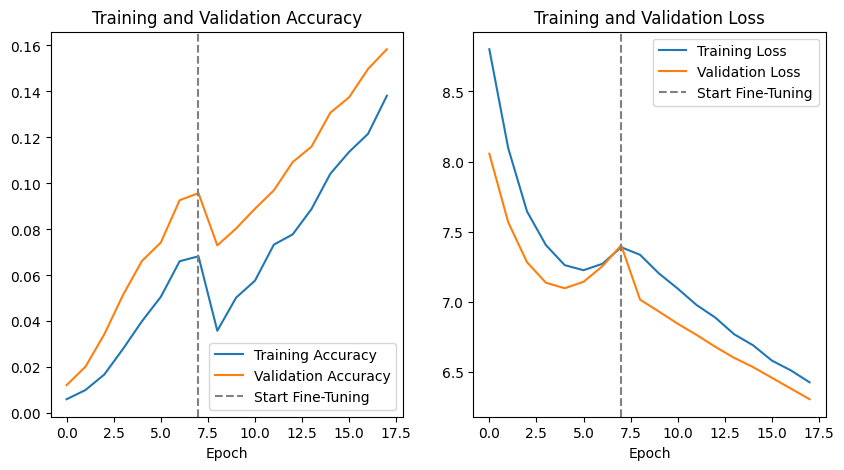

In [71]:
import matplotlib.pyplot as plt

# Combine the history from the two training stages
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axvline(initial_epochs_trained - 1, color='gray', linestyle='--', label='Start Fine-Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axvline(initial_epochs_trained - 1, color='gray', linestyle='--', label='Start Fine-Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

# Finished 